In [84]:
# This code imports some libraries that you will need.
# You should not need to modify it, though you are expected to make other imports later in your code.

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import numpy as np
import time

# Pandas for overview
import pandas as pd

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn import tree
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# Plot setup
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=7)
mpl.rc('xtick', labelsize=6)
mpl.rc('ytick', labelsize=6)
mpl.rc('figure', dpi=240)
plt.close('all')

import seaborn as sns
from sklearn.impute import SimpleImputer

In [179]:
#Read
df = pd.read_table('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes',sep=r'\s+\d+:', engine='python', header=None)

In [180]:
#rename
df.columns = ['label', 'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Specify the columns to impute
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness','BMI']

# Replace 0 with NaN in the specified columns
df[columns_to_impute] = df[columns_to_impute].replace(0, np.nan)

df.loc[df['label'] == -1, 'label'] = 0

# Initialize the imputer (e.g., using the mean strategy)
imputer = SimpleImputer(strategy='mean')

# Apply the imputer
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)



#df.drop(columns=['SkinThickness', 'BloodPressure'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   label                     768 non-null    float64
 1   Pregnancies               768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [138]:
df.describe()

,label,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.651042,3.845052,121.686763,72.405184,79.799479,32.457464,0.471876,33.240885
std,0.476951,3.369578,30.435949,12.096346,115.244002,6.875151,0.331329,11.760232
min,0.000000,0.000000,44.000000,24.000000,0.000000,18.200001,0.078000,21.000000
25%,0.000000,1.000000,99.750000,64.000000,0.000000,27.500000,0.243750,24.000000
50%,1.000000,3.000000,117.000000,72.202592,30.500000,32.400002,0.372500,29.000000
75%,1.000000,6.000000,140.250000,80.000000,127.250000,36.599998,0.626250,41.000000
max,1.000000,17.000000,199.000000,122.000000,846.000000,67.099998,2.420000,81.000000


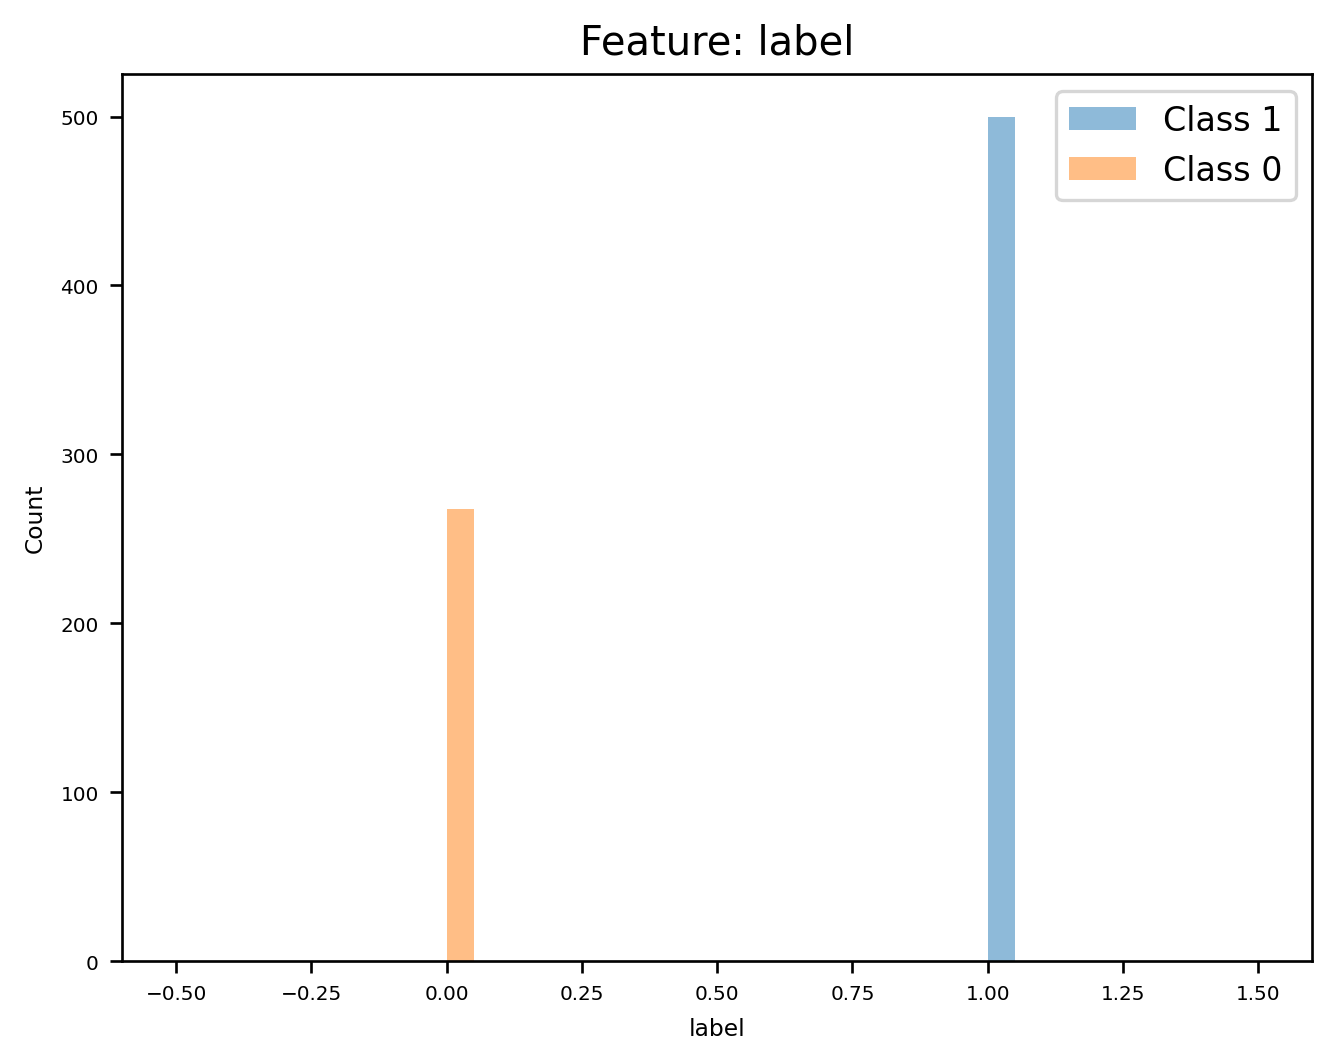

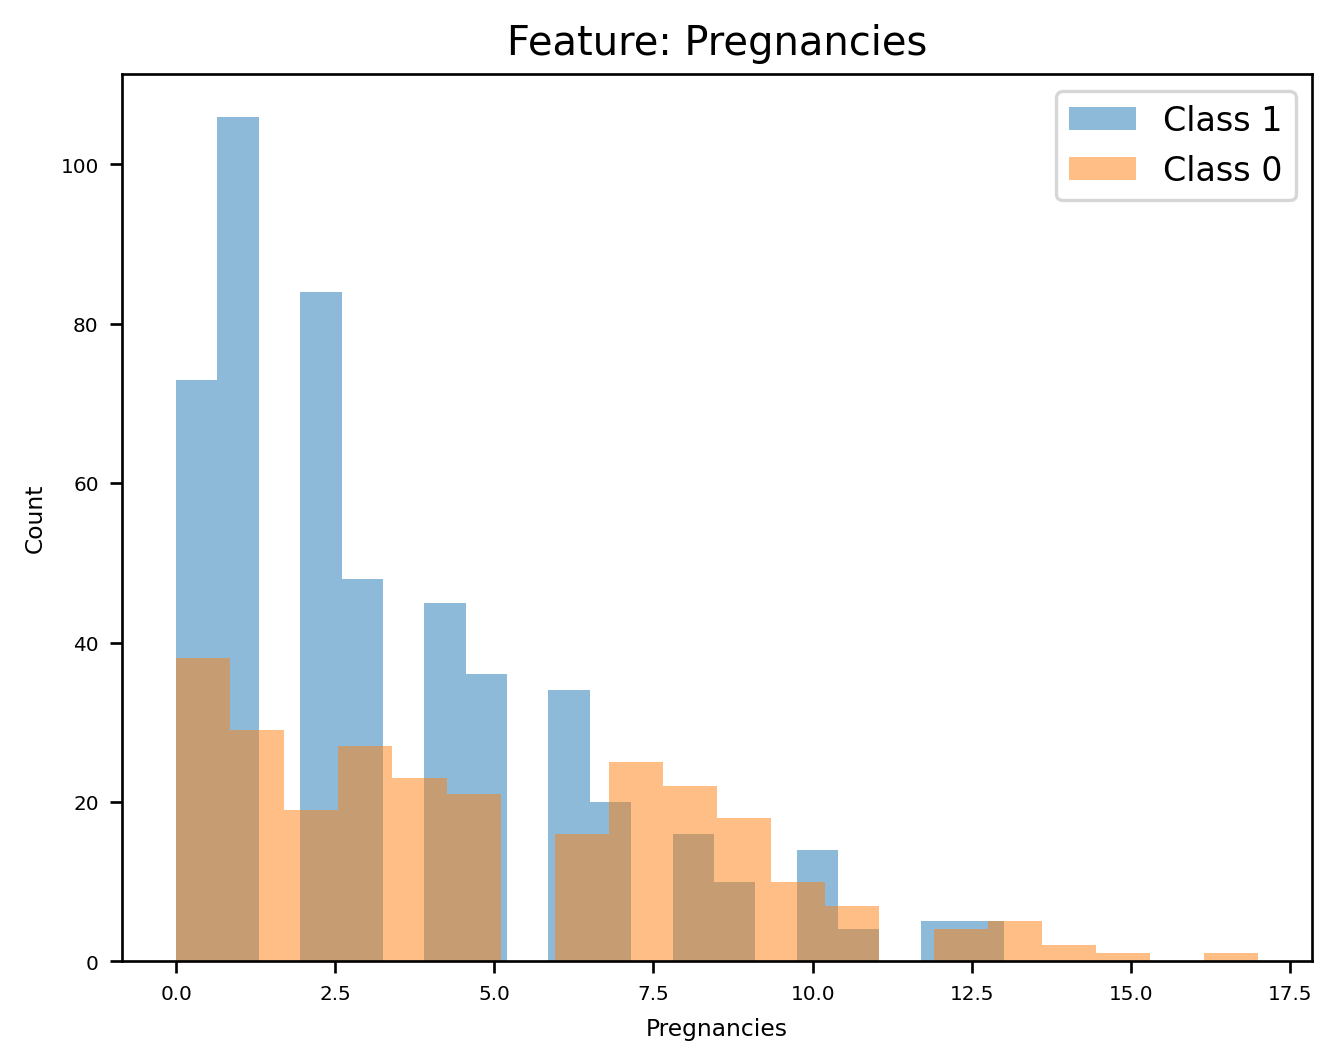

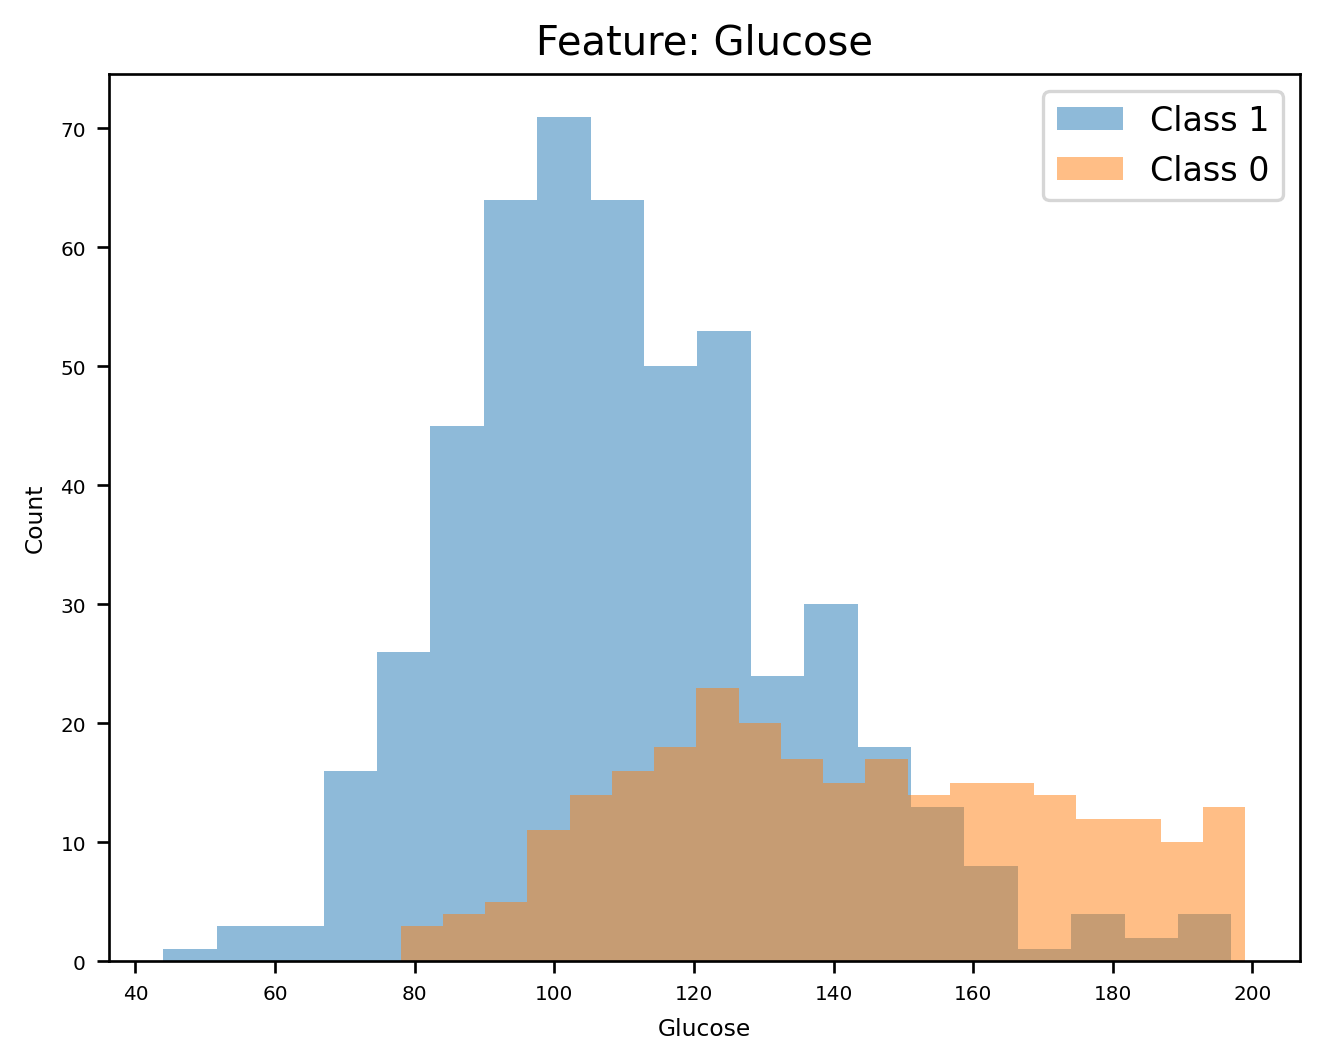

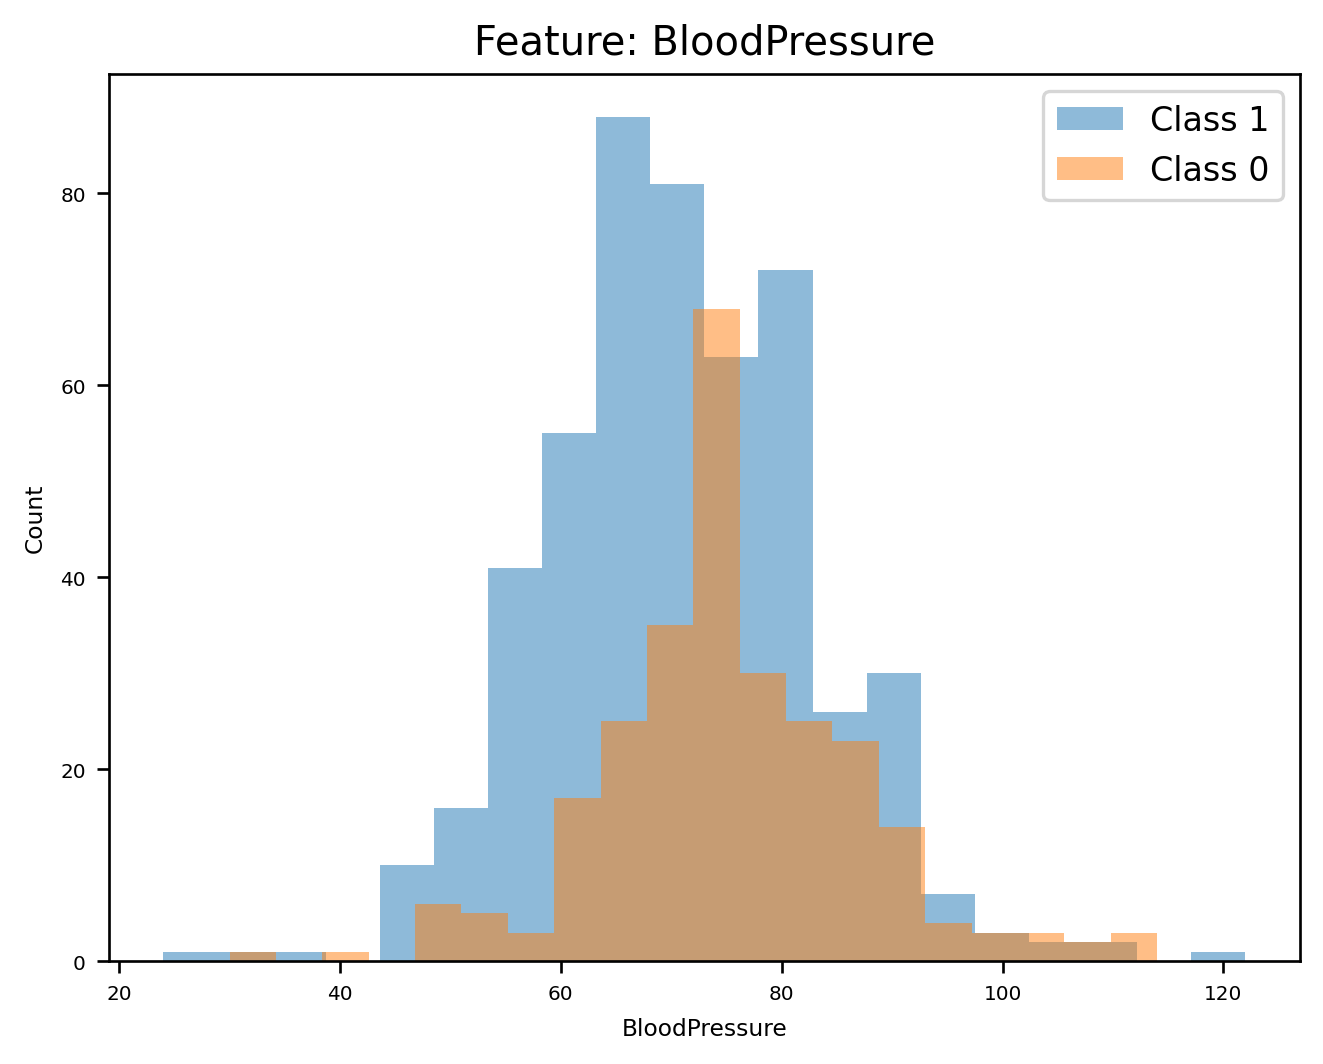

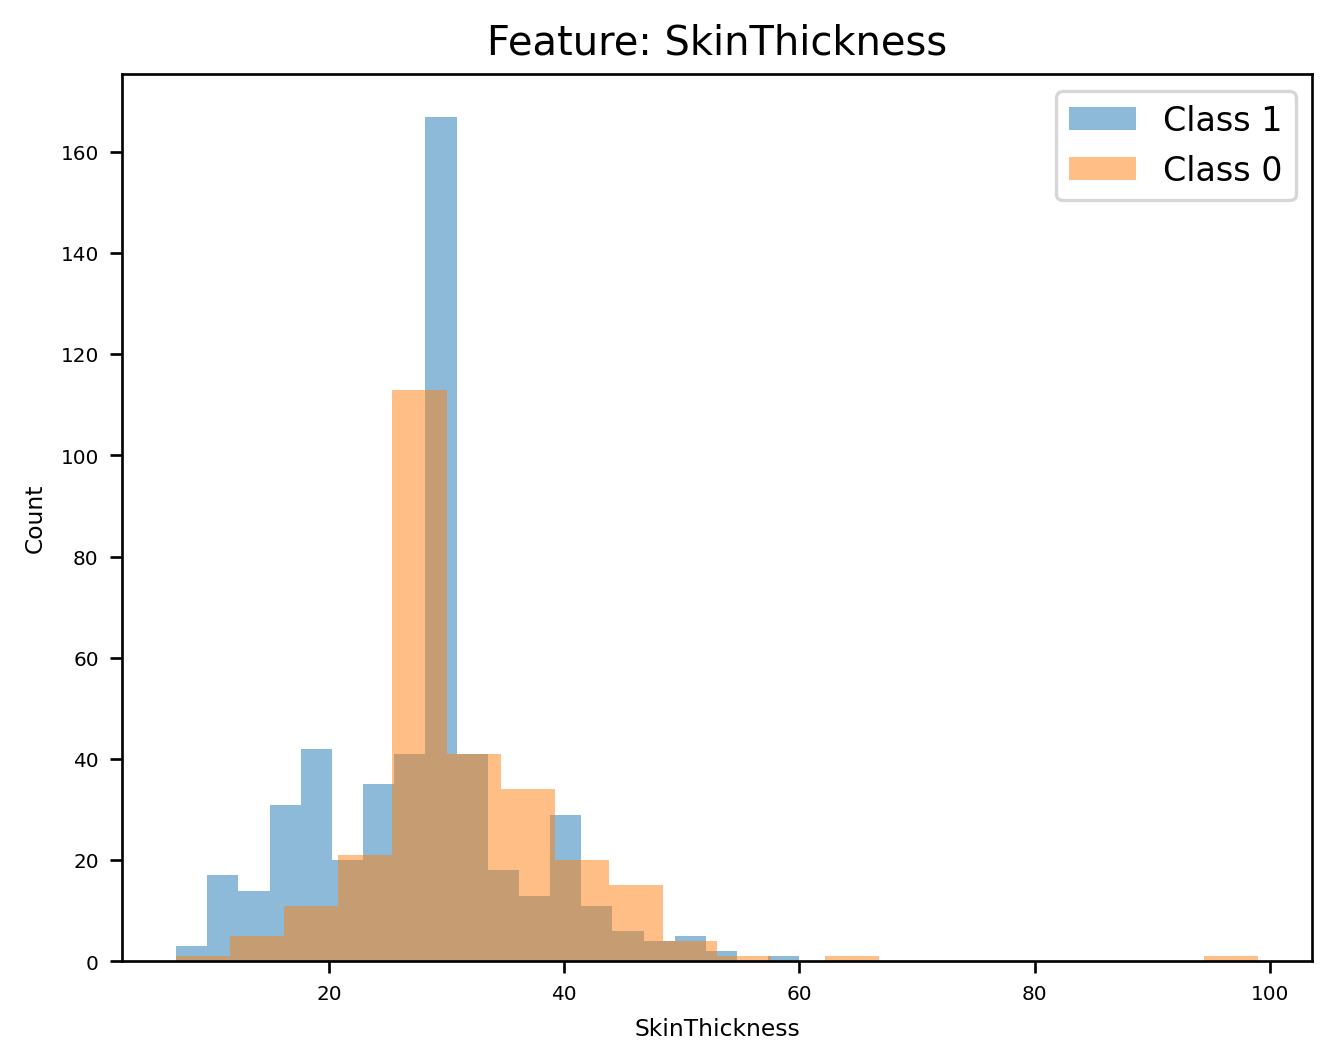

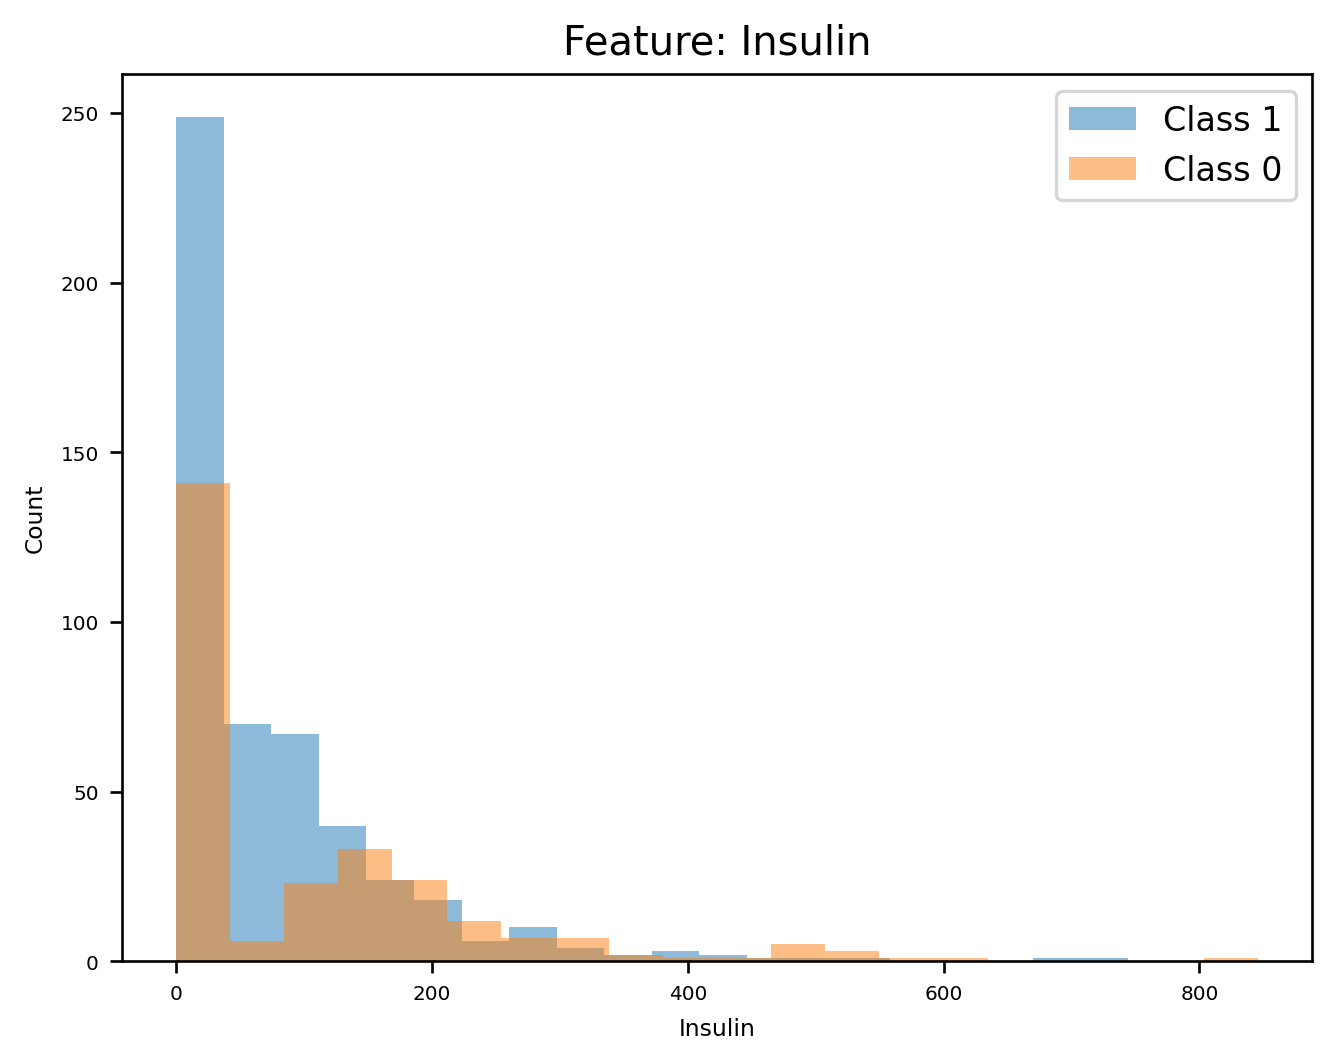

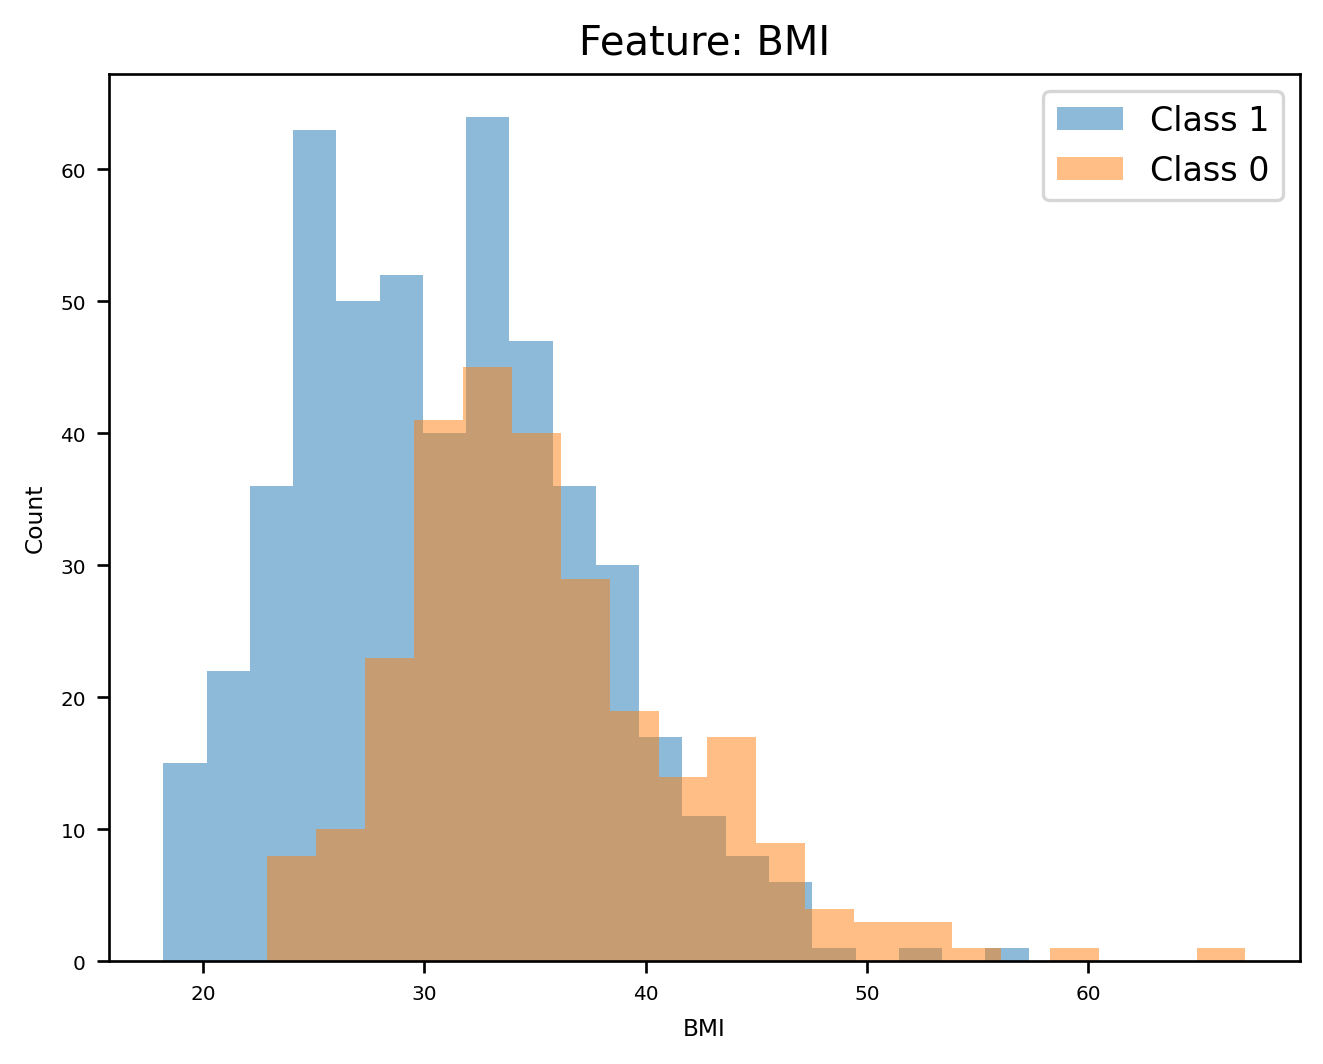

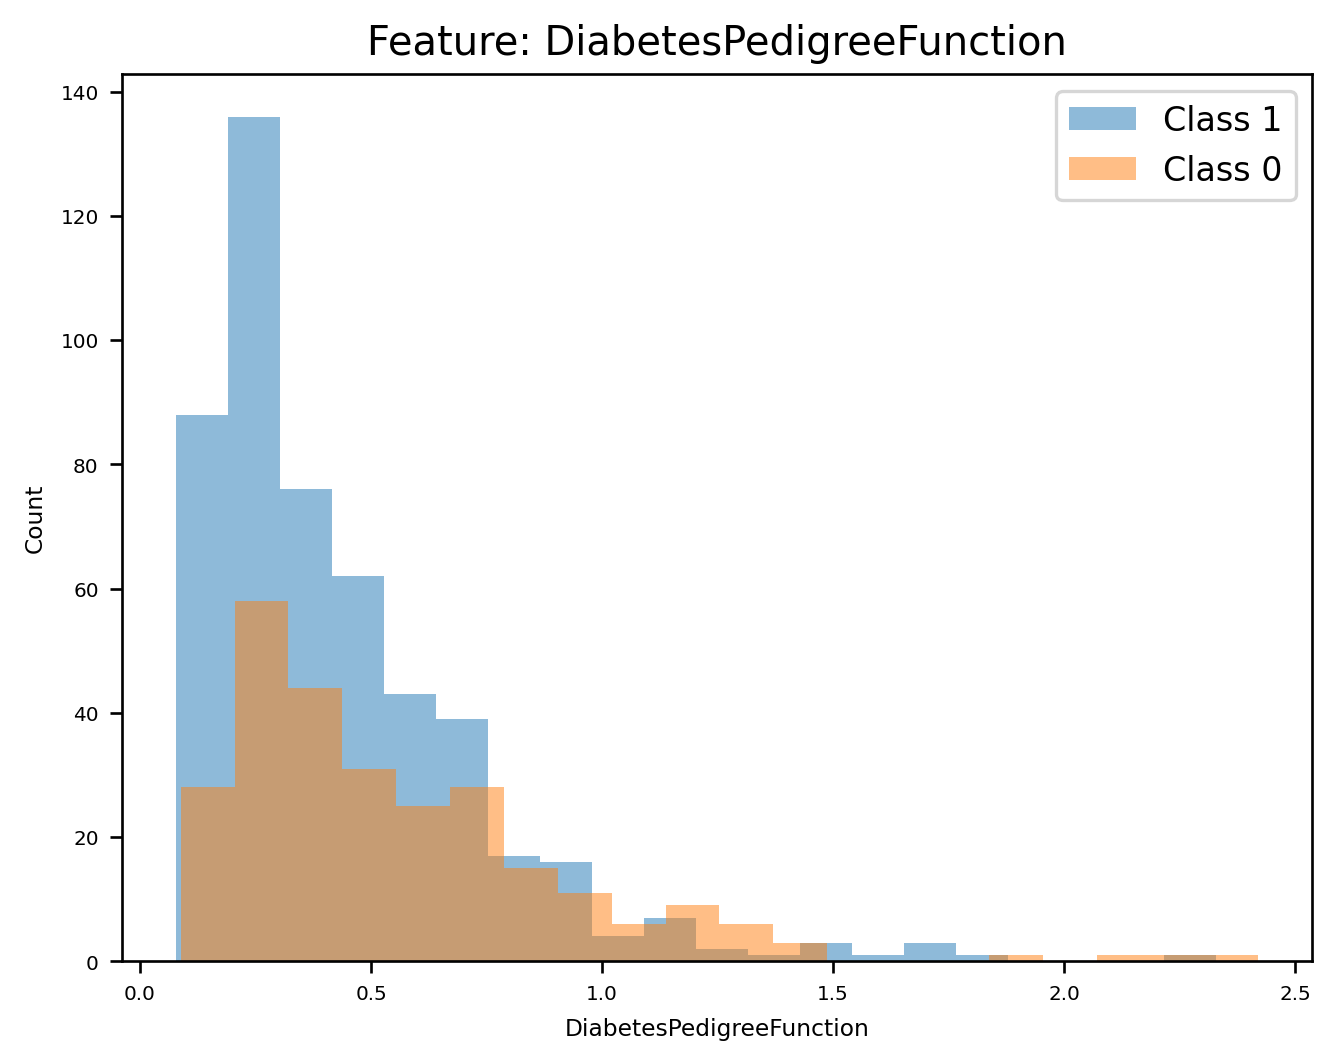

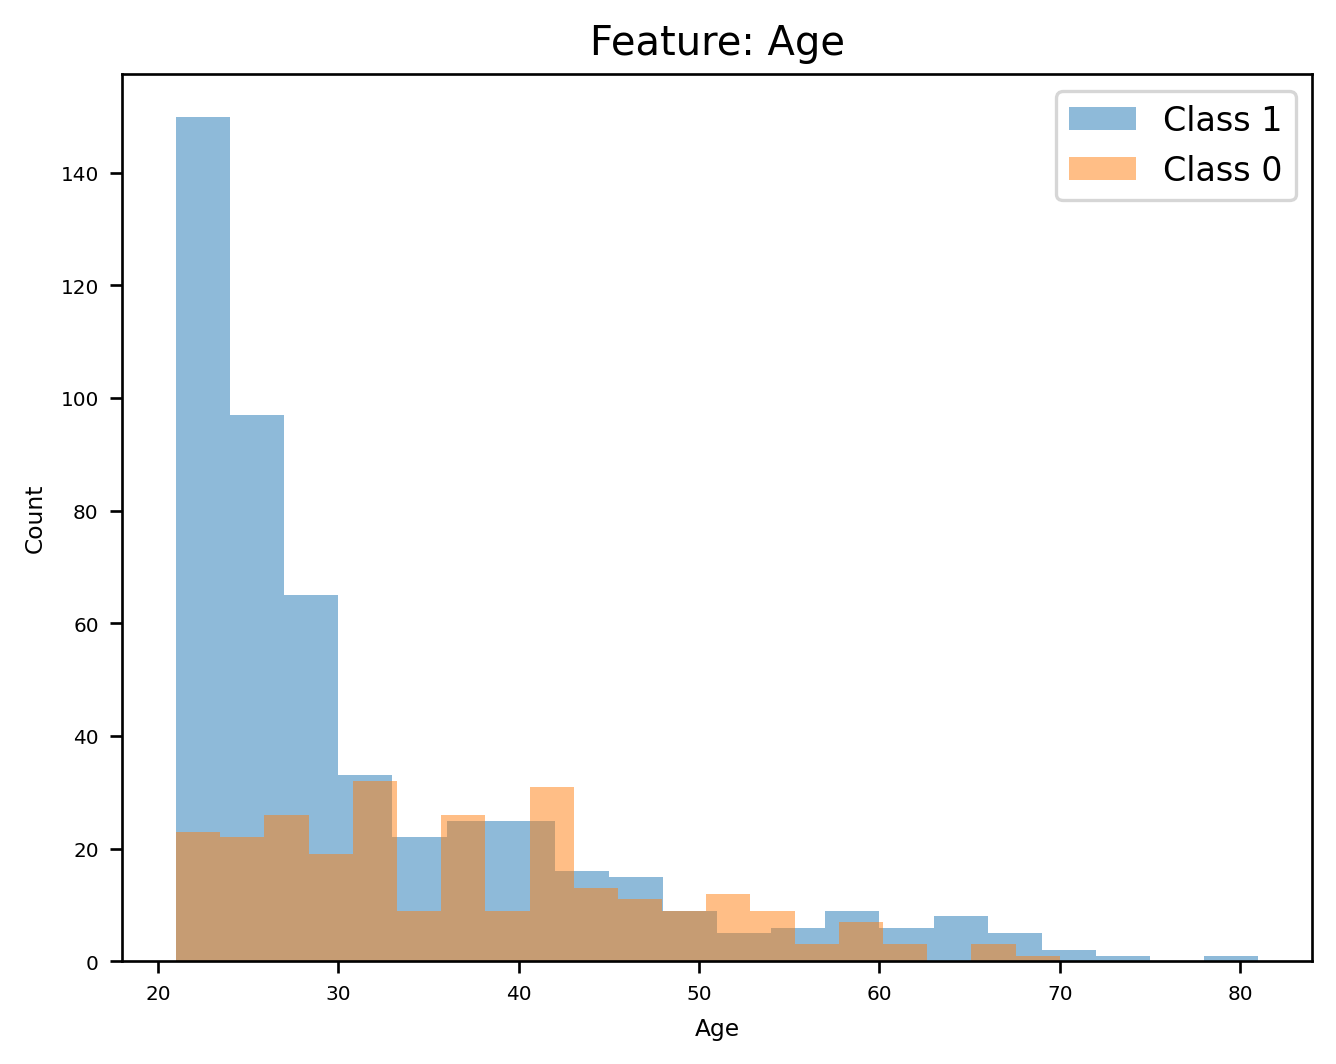

In [168]:
#Graphical dispay of features
label_names = [1,0]
for feat in df.columns:
    plt.title(f"Feature: {feat}")
    #plt.hist(cancer_df[feat])
    for cls in label_names:
        #plt.plot(cancer_df[cancer_df['label'] == cls][feat], '-o',label=f'Class {cls}')
        plt.hist(df[df['label'] == cls][feat], bins=20, alpha=0.5, label=f'Class {cls}')
    plt.legend()
    plt.xlabel(feat)
    plt.ylabel("Count")
    plt.show()

The following code foundation is generated by chatgpt on basis of previous research to make a specific prompt. The initial AI generated code is drastically modified to match the data and display correct results.

Prompt:
Give me a pytorch implementation of classification problem using a simple perceptron approach, f-beta score with beta =10 as evaluation metric, and graphically display the results as well as the loss curve. Give the option to easily adapt variables such as optimizer, learning rate and other optimisation options

In [181]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score, confusion_matrix, ConfusionMatrixDisplay

# Prepare features and labels
X = df.drop('label', axis=1).values
y = df['label'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a PyTorch dataset
class DiabetesDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = DiabetesDataset(X_train, y_train)
test_dataset = DiabetesDataset(X_test, y_test)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Define the Perceptron model
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(input_size, 1)  # Single output for binary classification

    def forward(self, x):
        return torch.sigmoid(self.fc(x))



# Baseline Perceptron

Epoch [10/100], Loss: 0.3302, F-beta: 0.8056
Epoch [20/100], Loss: 0.4062, F-beta: 0.8498
Epoch [30/100], Loss: 0.5705, F-beta: 0.8670
Epoch [40/100], Loss: 0.4443, F-beta: 0.8744
Epoch [50/100], Loss: 0.2206, F-beta: 0.8719
Epoch [60/100], Loss: 0.4022, F-beta: 0.8769
Epoch [70/100], Loss: 0.3209, F-beta: 0.8769
Epoch [80/100], Loss: 0.5815, F-beta: 0.8768
Epoch [90/100], Loss: 0.3686, F-beta: 0.8769
Epoch [100/100], Loss: 0.6192, F-beta: 0.8769
Test F-beta Score: 0.8381


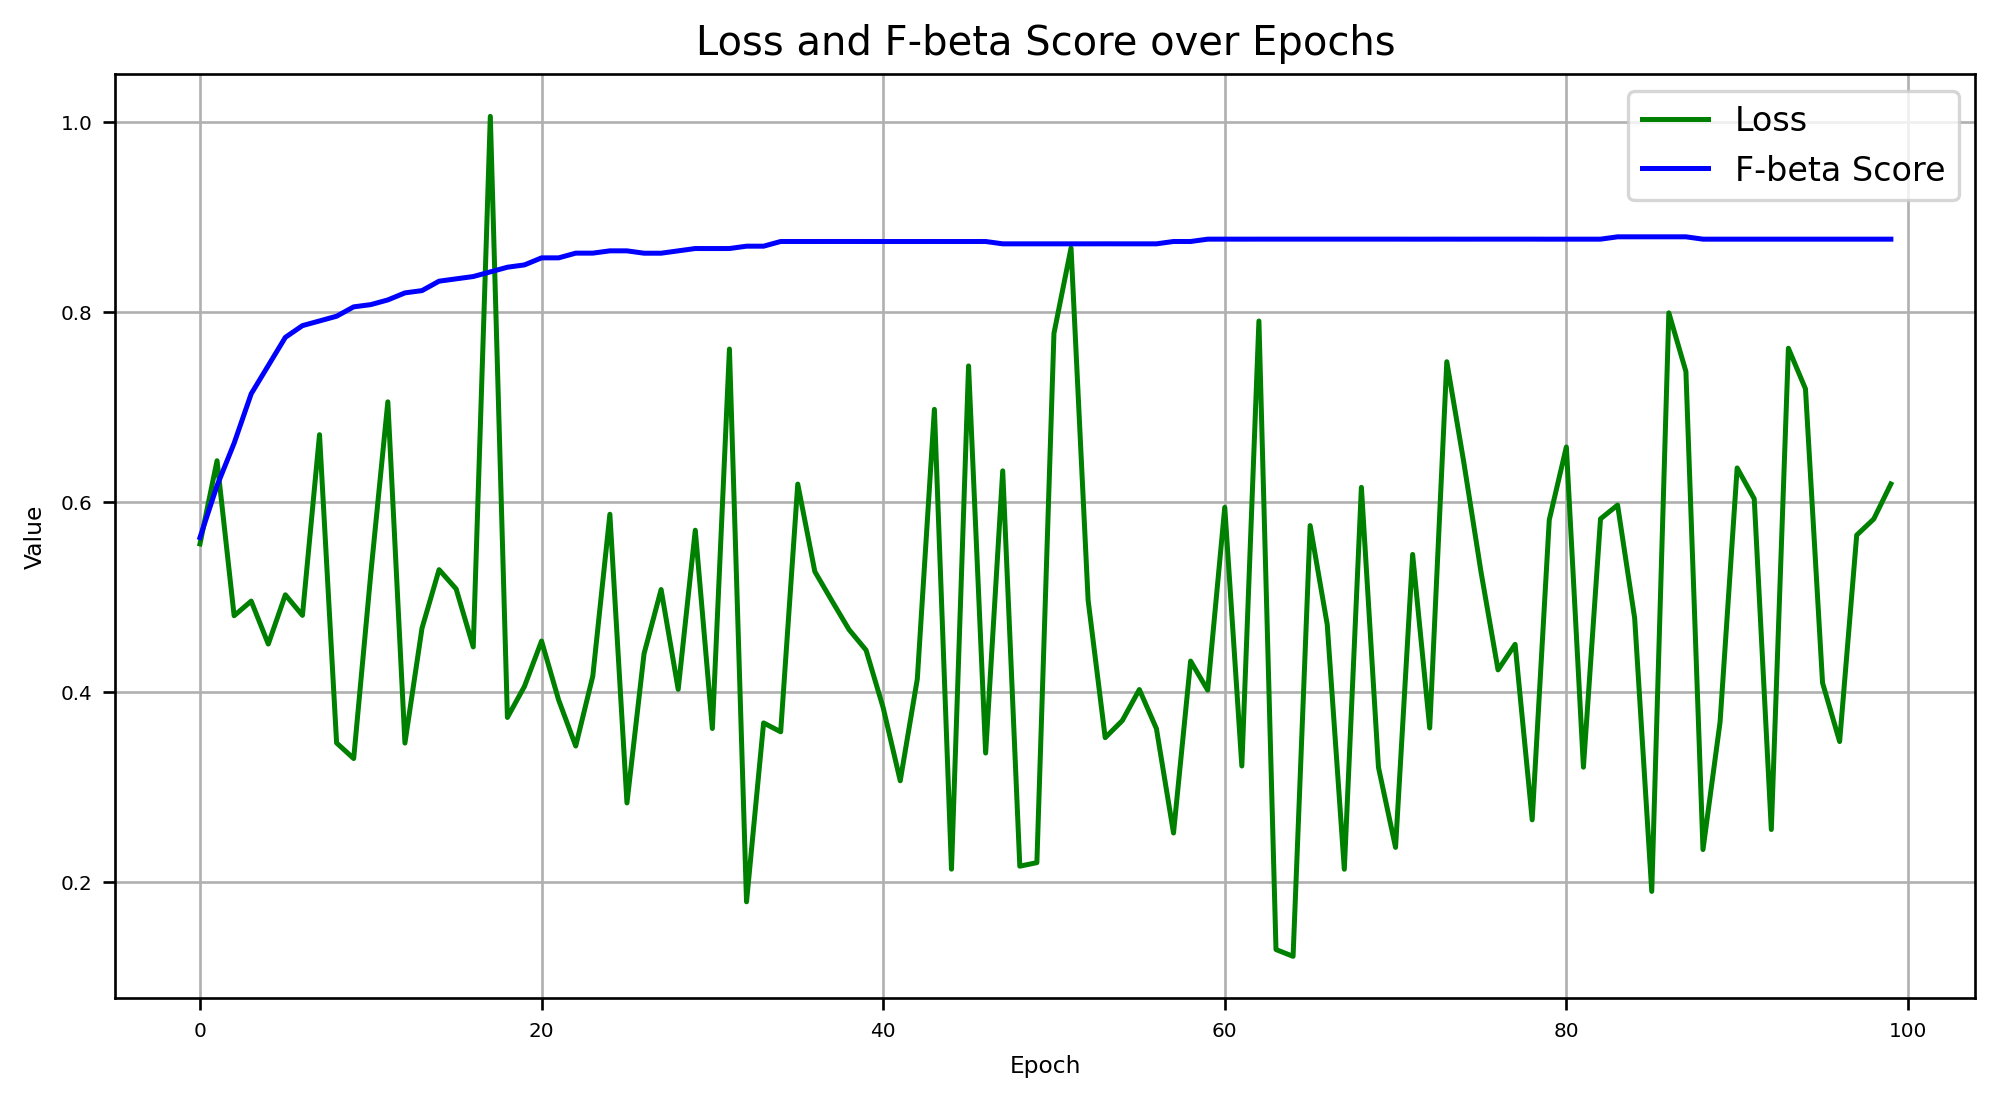

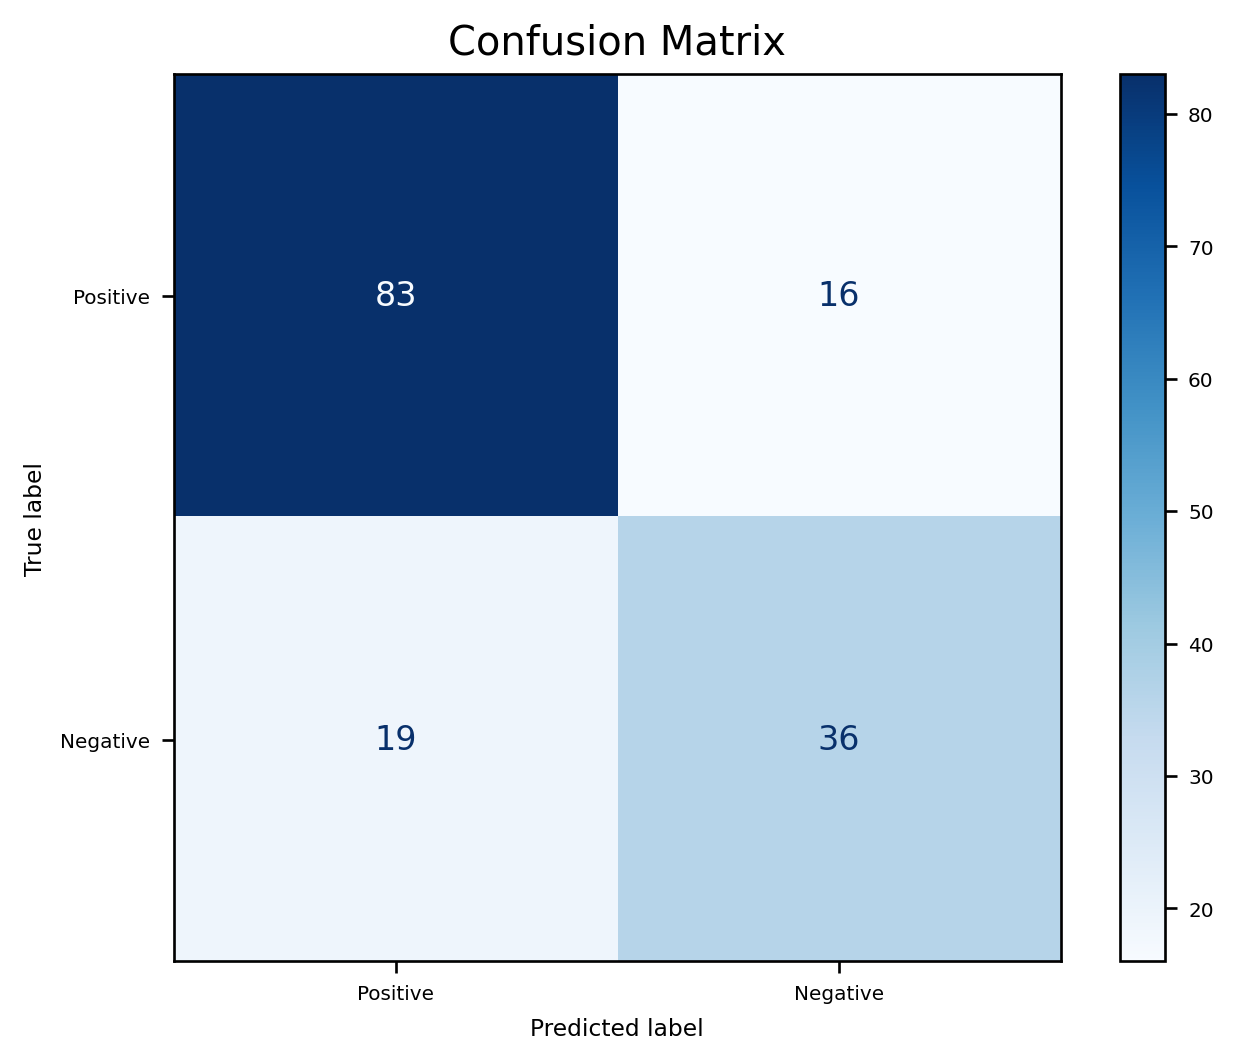

In [155]:
# Hyperparameters
input_size = X_train.shape[1]
learning_rate = 0.01  # You can change this
num_epochs = 100  # You can change this
optimizer_type = 'SGD'  # Change to 'Adam' or other optimizers

# Instantiate the model, loss function, and optimizer
model = Perceptron(input_size)
criterion = nn.BCELoss()

if optimizer_type == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
elif optimizer_type == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
else:
    raise ValueError("Unsupported optimizer type")

# Lists to store loss and f-beta score
loss_list = []
f_beta_list = []

# Training the model
for epoch in range(num_epochs):
    for features, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(features).squeeze()  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    loss_list.append(loss.item())
    
    # Evaluate on training data for F-beta score
    with torch.no_grad():
        train_outputs = model(train_dataset.features).squeeze()
        predicted = (train_outputs >= 0.5).float()
        f_beta = fbeta_score(y_train, predicted.numpy(), beta=10)
        f_beta_list.append(f_beta)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, F-beta: {f_beta:.4f}')

# Evaluation on test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(test_dataset.features).squeeze()
    predicted = (test_outputs >= 0.5).float()
    f_beta_test = fbeta_score(y_test, predicted.numpy(), beta=10)
    print(f'Test F-beta Score: {f_beta_test:.4f}')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predicted.numpy(), labels=[1,0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive","Negative"])

plt.figure(figsize=(10, 5))
plt.plot(loss_list, 'g-', label='Loss')
plt.plot(f_beta_list, 'b-', label='F-beta Score')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Loss and F-beta Score over Epochs')
plt.legend()
plt.grid()
plt.show()

# Display the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Learning Rate

Epoch [10/1000], Loss: 0.8516, F-beta: 0.2907
Epoch [20/1000], Loss: 0.7190, F-beta: 0.4006
Epoch [30/1000], Loss: 0.6919, F-beta: 0.5252
Epoch [40/1000], Loss: 0.6654, F-beta: 0.5823
Epoch [50/1000], Loss: 0.6429, F-beta: 0.6246
Epoch [60/1000], Loss: 0.6616, F-beta: 0.6569
Epoch [70/1000], Loss: 0.6254, F-beta: 0.6892
Epoch [80/1000], Loss: 0.6040, F-beta: 0.7016
Epoch [90/1000], Loss: 0.5764, F-beta: 0.7339
Epoch [100/1000], Loss: 0.6372, F-beta: 0.7562
Epoch [110/1000], Loss: 0.5320, F-beta: 0.7636
Epoch [120/1000], Loss: 0.5726, F-beta: 0.7784
Epoch [130/1000], Loss: 0.5319, F-beta: 0.7908
Epoch [140/1000], Loss: 0.5372, F-beta: 0.8032
Epoch [150/1000], Loss: 0.5877, F-beta: 0.8056
Epoch [160/1000], Loss: 0.5151, F-beta: 0.8105
Epoch [170/1000], Loss: 0.5132, F-beta: 0.8129
Epoch [180/1000], Loss: 0.5073, F-beta: 0.8179
Epoch [190/1000], Loss: 0.5304, F-beta: 0.8228
Epoch [200/1000], Loss: 0.5289, F-beta: 0.8228
Epoch [210/1000], Loss: 0.5015, F-beta: 0.8302
Epoch [220/1000], Loss

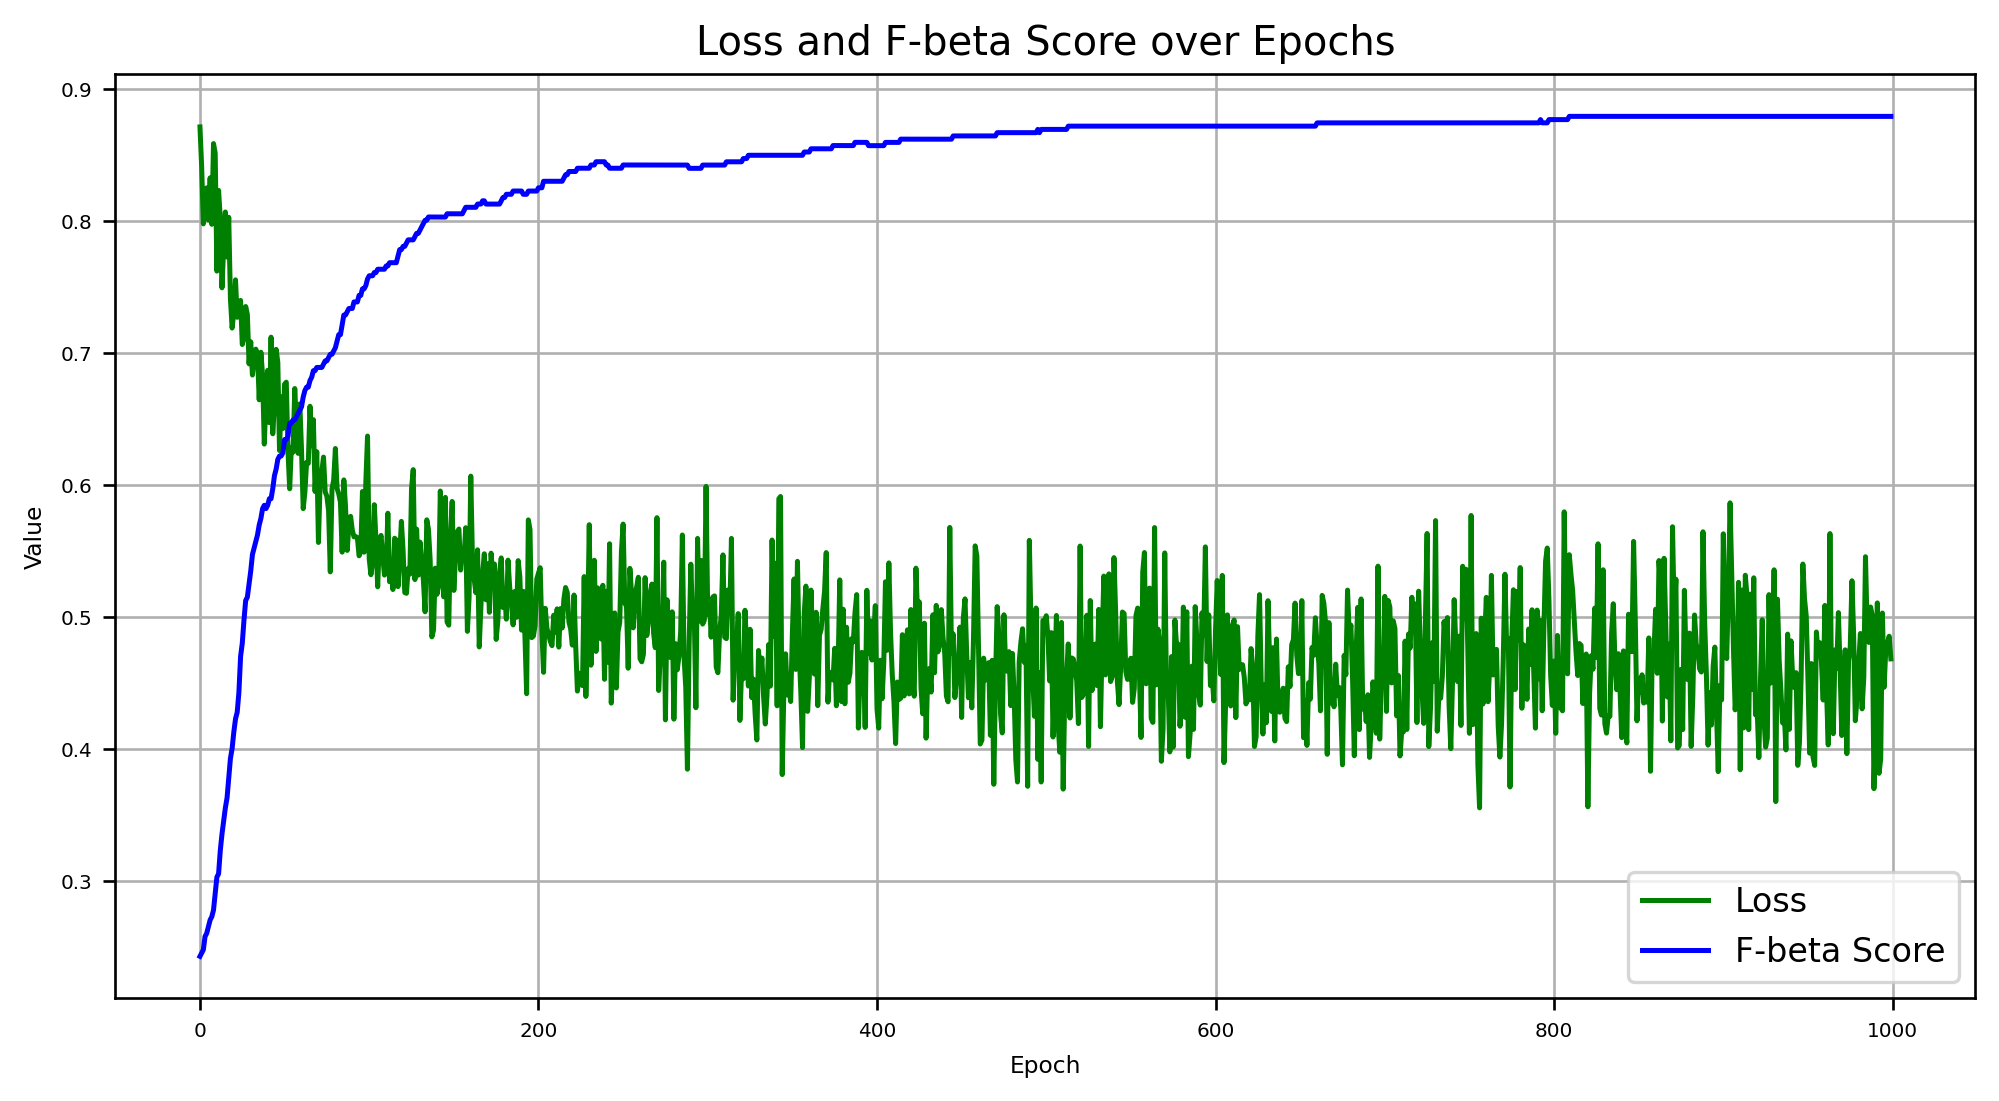

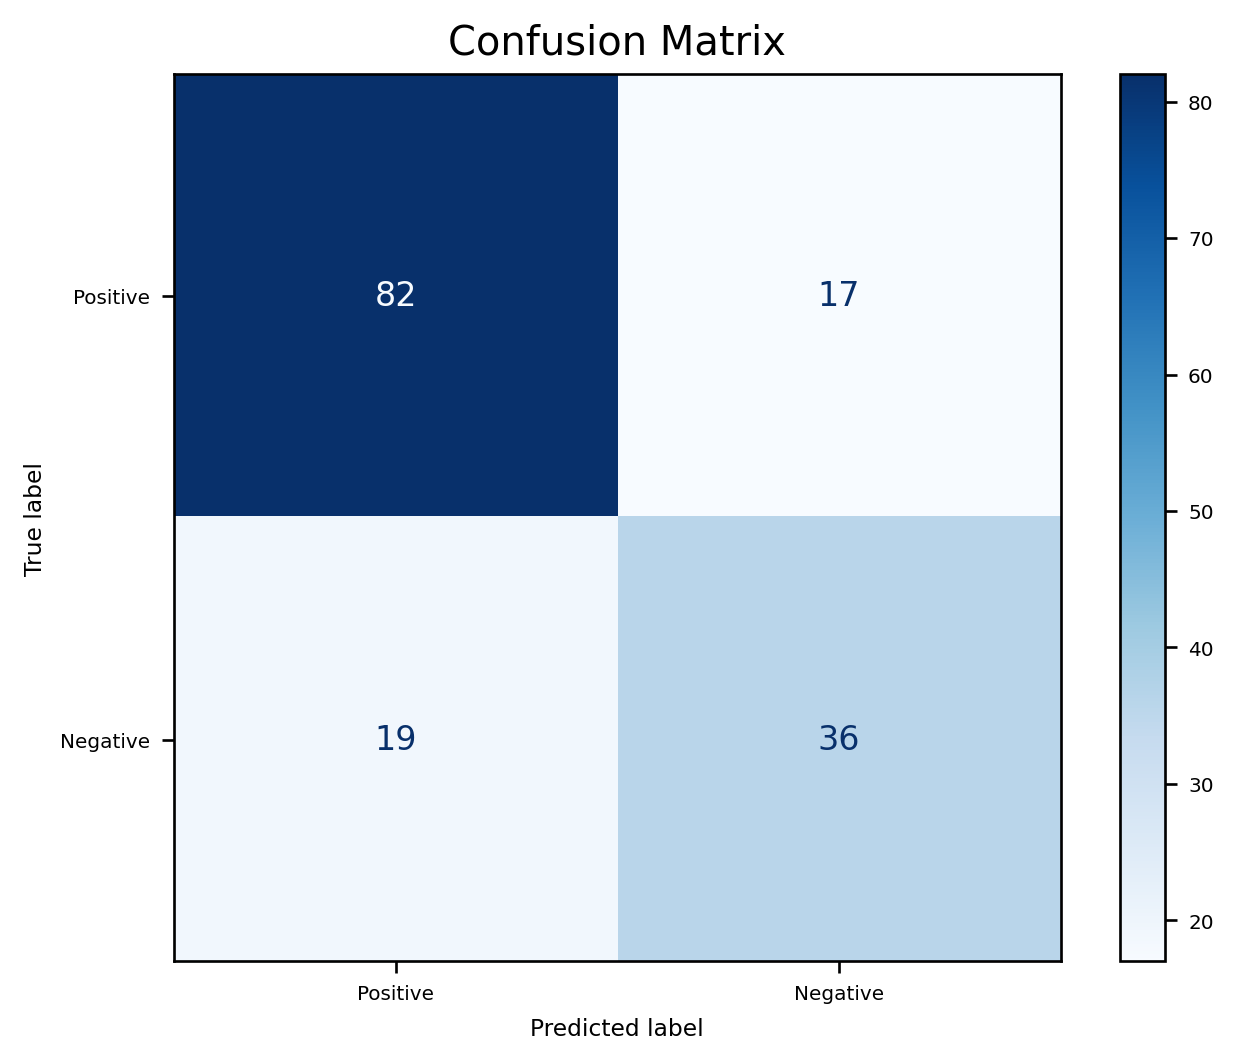

fc.weight: [[-0.1947092  -1.057132    0.12173726 -0.10561846  0.17812155 -0.631692
  -0.21266523 -0.37899297]]
fc.bias: [0.8439451]


In [209]:
# Hyperparameters
input_size = X_train.shape[1]
learning_rate = 0.01  # You can change this
num_epochs = 1000  # You can change this
optimizer_type = 'SGD'  # Change to 'Adam' or other optimizers

# Instantiate the model, loss function, and optimizer
model = Perceptron(input_size)
criterion = nn.BCELoss()

if optimizer_type == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
elif optimizer_type == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
else:
    raise ValueError("Unsupported optimizer type")

# Lists to store loss and f-beta score
loss_list = []
f_beta_list = []

# Training the model
for epoch in range(num_epochs):
    for features, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(features).squeeze()  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    loss_list.append(loss.item())
    
    # Evaluate on training data for F-beta score
    with torch.no_grad():
        train_outputs = model(train_dataset.features).squeeze()
        predicted = (train_outputs >= 0.5).float()
        f_beta = fbeta_score(y_train, predicted.numpy(), beta=10)
        f_beta_list.append(f_beta)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, F-beta: {f_beta:.4f}')

# Evaluation on test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(test_dataset.features).squeeze()
    predicted = (test_outputs >= 0.5).float()
    f_beta_test = fbeta_score(y_test, predicted.numpy(), beta=10)
    print(f'Test F-beta Score: {f_beta_test:.4f}')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predicted.numpy(), labels=[1,0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive","Negative"])

plt.figure(figsize=(10, 5))
plt.plot(loss_list, 'g-', label='Loss')
plt.plot(f_beta_list, 'b-', label='F-beta Score')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Loss and F-beta Score over Epochs')
plt.legend()
plt.grid()
plt.show()

# Display the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Accessing the weights after fitting the model
weights = model.state_dict()

# Display the weights
for name, param in weights.items():
    print(f"{name}: {param.data.numpy()}")

# Multilayer Perceptron

Epoch [10/500], Loss: 0.6758, F-beta: 0.9808
Epoch [20/500], Loss: 0.6796, F-beta: 0.9880
Epoch [30/500], Loss: 0.6777, F-beta: 0.9902
Epoch [40/500], Loss: 0.6790, F-beta: 0.9901
Epoch [50/500], Loss: 0.6769, F-beta: 0.9900
Epoch [60/500], Loss: 0.6792, F-beta: 0.9924
Epoch [70/500], Loss: 0.6861, F-beta: 0.9924
Epoch [80/500], Loss: 0.6740, F-beta: 0.9924
Epoch [90/500], Loss: 0.6696, F-beta: 0.9948
Epoch [100/500], Loss: 0.6686, F-beta: 0.9948
Epoch [110/500], Loss: 0.6786, F-beta: 0.9948
Epoch [120/500], Loss: 0.6684, F-beta: 0.9948
Epoch [130/500], Loss: 0.6680, F-beta: 0.9948
Epoch [140/500], Loss: 0.6613, F-beta: 0.9948
Epoch [150/500], Loss: 0.6806, F-beta: 0.9948
Epoch [160/500], Loss: 0.6612, F-beta: 0.9948
Epoch [170/500], Loss: 0.6740, F-beta: 0.9948
Epoch [180/500], Loss: 0.6654, F-beta: 0.9948
Epoch [190/500], Loss: 0.6707, F-beta: 0.9948
Epoch [200/500], Loss: 0.6728, F-beta: 0.9948
Epoch [210/500], Loss: 0.6697, F-beta: 0.9948
Epoch [220/500], Loss: 0.6648, F-beta: 0.99

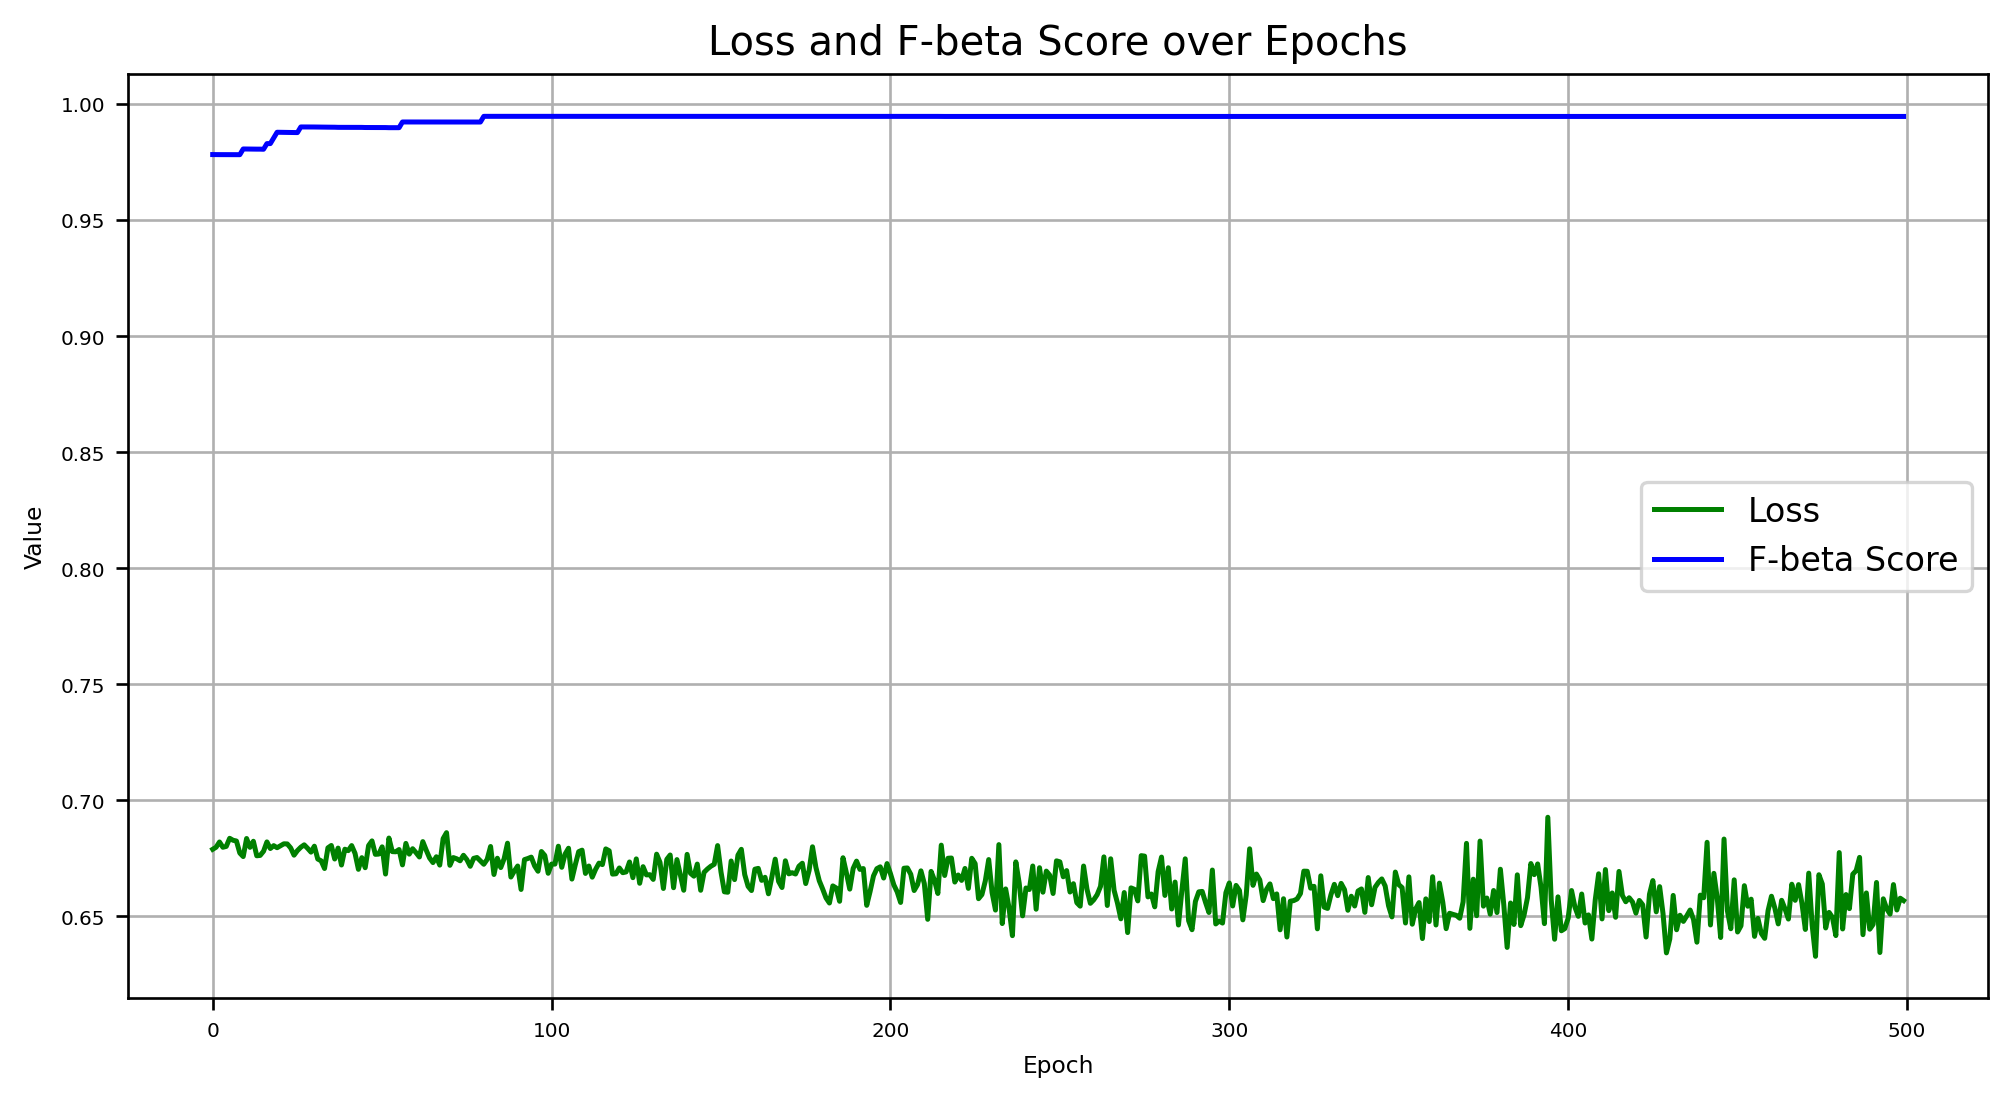

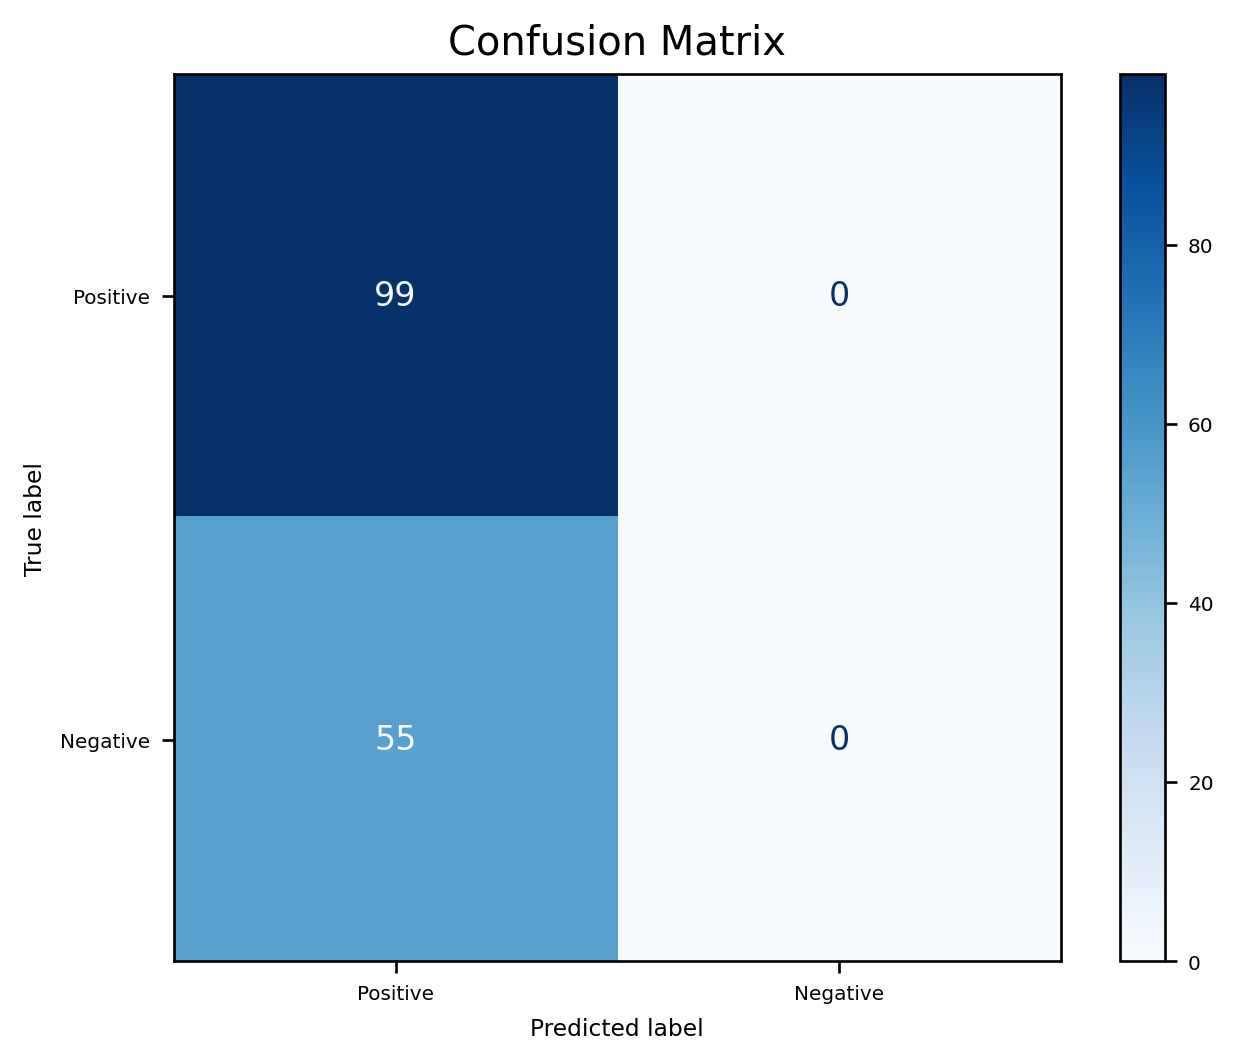

In [202]:
# Define the Multi-Layer Perceptron model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)  # First hidden layer with 16 neurons
        #self.fc2 = nn.Linear(64, 32)  
        self.fc3 = nn.Linear(32, 16) # Second hidden layer with 8 neurons
        self.fc4 = nn.Linear(16, 8) 
        self.fc5 = nn.Linear(8, 1)             # Output layer
        self.relu = nn.ReLU()                   # Activation function

    def forward(self, x):
        x = self.relu(self.fc1(x))
        #x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = torch.sigmoid(self.fc5(x))  # Output layer with sigmoid for binary classification
        return x

# Hyperparameters
input_size = X_train.shape[1]
learning_rate = 0.001  # You can change this
num_epochs = 500  # You can change this
optimizer_type = 'SGD'  # Change to 'Adam' or other optimizers

# Instantiate the model, loss function, and optimizer
model = MLP(input_size)
criterion = nn.BCELoss()

if optimizer_type == 'SGD':
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
elif optimizer_type == 'Adam':
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
else:
    raise ValueError("Unsupported optimizer type")

# Lists to store loss and F-beta score
loss_list = []
f_beta_list = []

# Training the model
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for features, labels in train_loader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(features).squeeze()  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

    loss_list.append(loss.item())
    
    # Calculate F-beta score on the training set
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        train_outputs = model(train_dataset.features).squeeze()
        predicted = (train_outputs >= 0.5).float()
        f_beta = fbeta_score(y_train, predicted.numpy(), beta=10)
        f_beta_list.append(f_beta)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, F-beta: {f_beta:.4f}')

# Final evaluation on the test data
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    test_outputs = model(test_dataset.features).squeeze()
    predicted = (test_outputs >= 0.5).float()
    f_beta_test = fbeta_score(y_test, predicted.numpy(), beta=10)
    print(f'Test F-beta Score: {f_beta_test:.4f}')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predicted.numpy(), labels=[1, 0])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])

plt.figure(figsize=(10, 5))
plt.plot(loss_list, 'g-', label='Loss')
plt.plot(f_beta_list, 'b-', label='F-beta Score')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Loss and F-beta Score over Epochs')
plt.legend()
plt.grid()
plt.show()

# Display the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
